1. Build a machine learning model to create group of mall customers
based on their annual income and spending score for a given
dataset


## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## importing dataset

In [2]:
dataset=pd.read_csv("Mall_Customers (1).csv")

In [3]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
dataset=dataset.iloc[:,3:5]

In [5]:
dataset

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Annual Income (k$)      200 non-null    int64
 1   Spending Score (1-100)  200 non-null    int64
dtypes: int64(2)
memory usage: 3.2 KB


In [7]:
dataset.describe()

,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


## Data preprocessing

## Data cleaning

### Cheking for null values

In [8]:
dataset.isna().sum()

Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Checking for outlier

<AxesSubplot:>

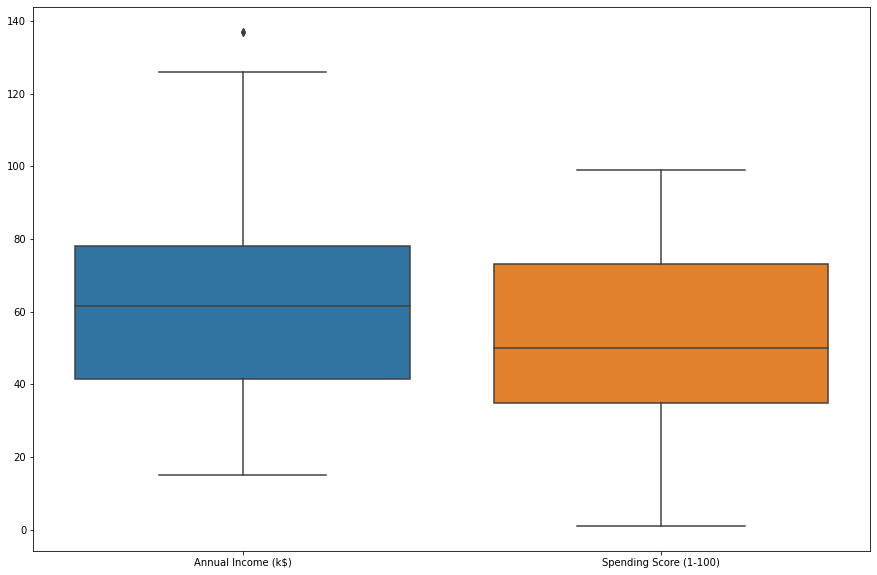

In [9]:
plt.figure(figsize=(15,10))
sns.boxplot(data=dataset)

### Handling for outlier

In [10]:
for i in dataset.columns:
    percentiles = dataset[i].quantile([0.25,0.75]).values
    dataset[i][dataset[i] <= percentiles[0]] = percentiles[0]
    dataset[i][dataset[i] >= percentiles[1]] = percentiles[1]

C:\Users\yamin\AppData\Local\Temp\ipykernel_12208\3311194956.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[i][dataset[i] <= percentiles[0]] = percentiles[0]


<AxesSubplot:>

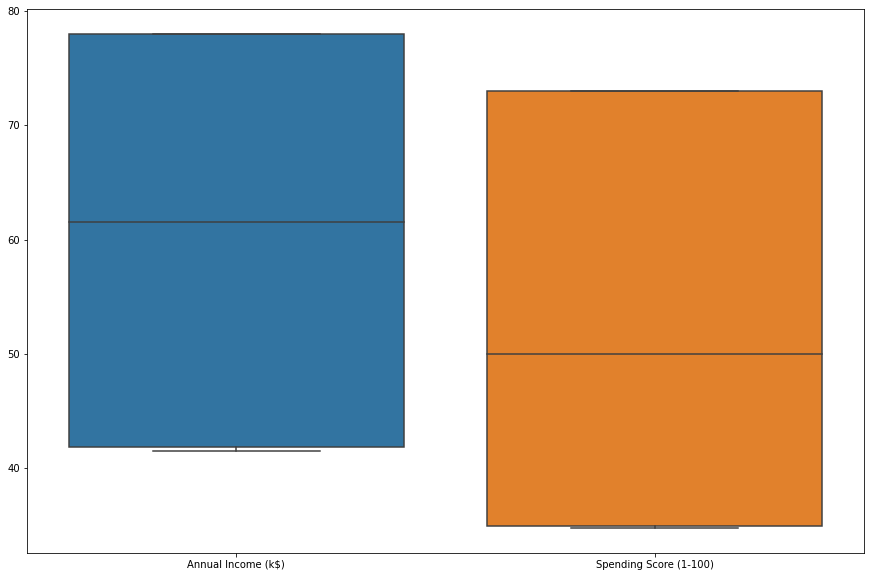

In [11]:
plt.figure(figsize=(15,10))
sns.boxplot(data=dataset)

## Feature scaling

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
sc=StandardScaler()
dataset=sc.fit_transform(dataset)

In [14]:
dataset

array([[-1.25246736, -0.8747878 ],
       [-1.25246736,  1.37547021],
       [-1.25246736, -1.15607005],
       [-1.25246736,  1.37547021],
       [-1.25246736, -0.80860374],
       [-1.25246736,  1.37547021],
       [-1.25246736, -1.15607005],
       [-1.25246736,  1.37547021],
       [-1.25246736, -1.15607005],
       [-1.25246736,  1.30928615],
       [-1.25246736, -1.15607005],
       [-1.25246736,  1.37547021],
       [-1.25246736, -1.15607005],
       [-1.25246736,  1.37547021],
       [-1.25246736, -1.15607005],
       [-1.25246736,  1.37547021],
       [-1.25246736, -1.13952404],
       [-1.25246736,  0.91218179],
       [-1.25246736, -1.15607005],
       [-1.25246736,  1.37547021],
       [-1.25246736, -1.13952404],
       [-1.25246736,  1.37547021],
       [-1.25246736, -1.15607005],
       [-1.25246736,  1.37547021],
       [-1.25246736, -1.15607005],
       [-1.25246736,  1.37547021],
       [-1.25246736, -1.15607005],
       [-1.25246736,  0.5812615 ],
       [-1.25246736,

## Model building

In [17]:
from sklearn.cluster import KMeans  

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


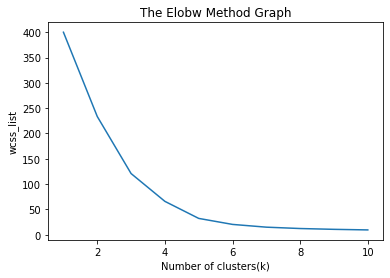

In [18]:
wcss_list= []
  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(dataset)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()

In [19]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(dataset)  

## Data vitualization

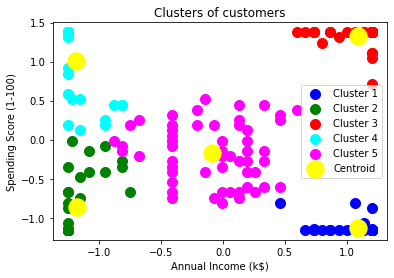

In [20]:
plt.scatter(dataset[y_predict == 0, 0], dataset[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(dataset[y_predict == 1, 0], dataset[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(dataset[y_predict== 2, 0], dataset[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
plt.scatter(dataset[y_predict == 3, 0], dataset[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
plt.scatter(dataset[y_predict == 4, 0], dataset[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Clusters of customers')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()  
plt.show()  